In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [3]:
baseConsumo = pd.read_csv('Consumo.csv')

In [5]:
baseConsumo.head()

,Cod,Sexo,Idade,Salario Anual (milhares),Score Gastos (0-100)
0,1,Masculino,19,17,39
1,2,Masculino,21,17,81
2,3,Feminino,20,19,6
3,4,Feminino,23,19,77
4,5,Feminino,31,20,40


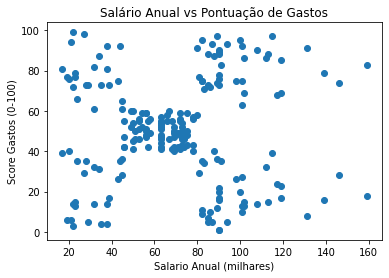

In [6]:
#style verificar referencias sobre os modelos
#plt.style.use('fivethirtyeight')
#Tamanho da tela em em proporções
#plt.figure(1, figsize=[15,6])
#declarando os eixos x e y dentro da data base com tamanho ampliado "s" e transparencia dos pontos em "alpha"
plt.scatter(x = 'Salario Anual (milhares)', y = 'Score Gastos (0-100)', data=baseConsumo)
#titulo do grafico
plt.title('Salário Anual vs Pontuação de Gastos')
#Nome do eixo "x"
plt.xlabel('Salario Anual (milhares)')
#nome do eixo "y"
plt.ylabel('Score Gastos (0-100)')
#Apresentar o grafico
plt.show()

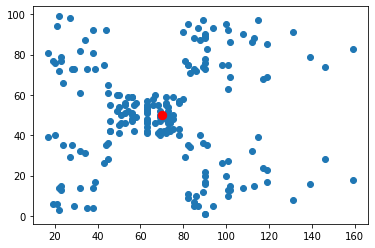

[[70.14 50.2 ]]
316772.0800000001


In [23]:
X2 = baseConsumo[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

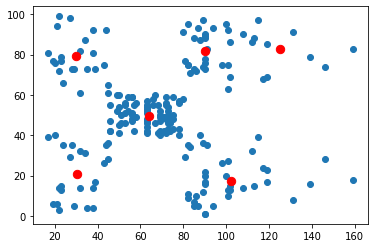

44532.0999700246


In [19]:
X2 = baseConsumo[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()
print(kmeans.inertia_)

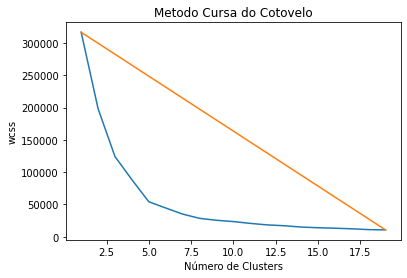

In [17]:
wcss = []
for i in range (1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Metodo Cursa do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('wcss')
plt.show()